In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import time
from tabulate import tabulate

In [2]:
#Reading data
root = "/content/drive/My Drive/2018AAPS1242H_NNFL (Assignment 1)/"
X_train = pd.read_excel(root+"Data/training_feature_matrix.xlsx",header=None).to_numpy(dtype=float)
Y_train = pd.read_excel(root+"Data/training_output.xlsx",header=None).to_numpy(dtype=float)
X_test = pd.read_excel(root+"Data/test_feature_matrix.xlsx",header=None).to_numpy(dtype=float)
Y_test = pd.read_excel(root+"Data/test_output.xlsx",header=None).to_numpy(dtype=float)

In [3]:
#Plotting functions
def plot2d(label1, label2, y, title):
    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (10, 10)
    plt.plot(y)
    plt.title(title + " : " + label1 + "  vs  " + label2)
    plt.xlabel(label2)
    plt.ylabel(label1)
    plt.show()


def plot3d(x, y, z, label1, label2, label3, title):
    fig = plt.figure()
    plt.title(title + " : " + label1 + "  vs  " + label2 + " vs "+ label3)
    plt.rcParams["figure.figsize"] = (10, 10)
    ax = plt.axes(projection='3d')
    ax.plot3D(x, y, z, 'blue')
    ax.set_xlabel(label1)
    ax.set_ylabel(label2)
    ax.set_zlabel(label3)

In [4]:
#Helper functions
def getcol(data, c):
    col = []
    for i in range(0, data.shape[0]):
        col.append(data[i][c])
    return col

def split(data, op):
    x1 = data[0:,0]
    x2 = data[0:,1]
    y = op[0:,0]
    return x1, x2, y

def split1(data):
    x1 = data[0:,0]
    x2 = data[0:,1]
    y = data[:,2]
    return x1, x2, y

def normalize(npm):
    for i in range(len(npm[0])):
        npm[:,i] = (npm[:,i]-npm[:,i].mean()) / npm[:,i].std()
    return npm

def hypothesis(w0, w1, w2, x1, x2):
    hyp = np.ones(x1.shape[0])
    for i in range(0, x1.shape[0]):
        hyp[i] = w0 + w1*x1[i] + w2*x2[i]
    return hyp

def summation(hyp, rows, y_data, x_data):
    sum = 0
    for i in range(0, rows):
        sum = sum + (hyp[i]-y_data[i])*x_data[i]
    return sum

def mse(h, y, rows):
    mse = 0
    for i in range(0, rows):
        mse = mse + (h[i]-y[i])**2
    return mse

def pred(w0, w1, w2, X1, X2, Y):
    pred = hypothesis(w0, w1, w2, X1, X2)
    mean = np.mean(pred.transpose())
    sdev = np.std(pred.transpose())
    pred = pred * sdev + mean
    error = 0
    for i in range(0, pred.shape[0]):
        error = error + (pred[i]-Y[i])**2
    error = error/pred.shape[0]
    print("MSE :", error)
    return error

def initialize_parameters(x1):
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
    x0 = np.ones(x1.shape[0])
    return w0,w1,w2,x0

In [5]:
X_train = normalize(X_train)
Y_train = normalize(Y_train)
X_test = normalize(X_test)
Y_test = normalize(Y_test)
x1, x2, y = split(X_train, Y_train)
X1, X2, Y = split(X_test, Y_test)

# **Question 3**

In [6]:
def wsquare(w0,w1,w2):
    sum = 0
    sum = sum+w0**2
    sum = sum+w1**2
    sum = sum+w2**2
    return sum

In [7]:
def ridge_batch_gradient_descent(x1, x2, y):
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
    x0 = np.ones(x1.shape[0])
    iters = 300
    alpha = 0.0001
    lamb = 0.05
    h = hypothesis(w0, w1, w2, x1, x2)
    cost = [0 for i in range(iters)]
    w0_l = [1 for i in range(iters)]
    w1_l = [1 for i in range(iters)]
    w2_l = [1 for i in range(iters)]
    for i in range(0, iters):
        w0 = (1-(alpha*lamb))*w0 - alpha*summation(h, y.shape[0], y, x0)
        w1 = (1-(alpha*lamb))*w1 - alpha*summation(h, y.shape[0], y, x1)
        w2 = (1-(alpha*lamb))*w2 - alpha*summation(h, y.shape[0], y, x2)
        w0_l[i] = w0
        w1_l[i] = w1
        w2_l[i] = w2
        wsum = wsquare(w0,w1,w2)
        h = hypothesis(w0, w1, w2, x1, x2)
        cost[i] = (1 * 0.5 * mse(h, y, y.shape[0])/x1.shape[0] + lamb * wsum) * 0.5
    return w0, w1, w2, cost, w1_l, w2_l

BATCH GRADIENT DESCENT (RIDGE REGRESSION)
 
W0 : 0.0003702059086604994
W1 : 0.04378327555112835
W2 : 0.25830340052717976
 


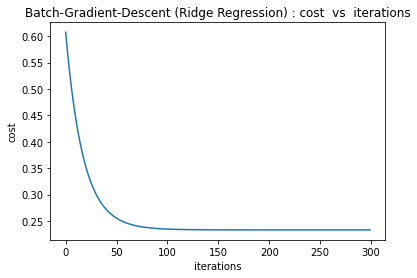

 
 
MSE : 0.9805255423589134


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


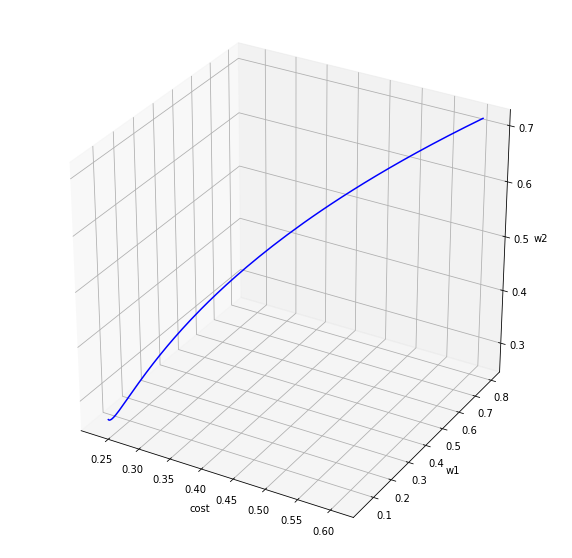

In [8]:
print("BATCH GRADIENT DESCENT (RIDGE REGRESSION)")
print(" ")
w0_r_bgd, w1_r_bgd, w2_r_bgd, cost_r_bgd, w1_l_r_bgd, w2_l_r_bgd = ridge_batch_gradient_descent(x1, x2, y)
print("W0 :", w0_r_bgd)
print("W1 :", w1_r_bgd)
print("W2 :", w2_r_bgd)
print(" ")
plot2d("cost", "iterations", cost_r_bgd, "Batch-Gradient-Descent (Ridge Regression)")
print(" ")
plot3d(cost_r_bgd, w1_l_r_bgd, w2_l_r_bgd, "cost", "w1", "w2", "Batch-Gradient-Descent (Ridge Regression)")
print(" ")
mse_r_bgd = pred(w0_r_bgd, w1_r_bgd, w2_r_bgd, X1, X2, Y)
time.sleep(5)
print(" ")

In [9]:
def ridge_mini_batch(x1, x2, y):
    iters = 500
    batch = 5
    alpha = 0.00001
    lamb = 0.05
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
    x0 = np.ones(x1.shape[0])
    cost = [0 for i in range(iters)]
    w0_l = [1 for i in range(iters)]
    w1_l = [1 for i in range(iters)]
    w2_l = [1 for i in range(iters)]
    for i in range(0, iters):
        temp = np.column_stack((x1, x2, y))
        np.random.shuffle(temp)
        x1, x2, y = split1(temp)
        for j in range(0, batch):
            h = hypothesis(w0, w1, w2, x1, x2)
            w0 = (1-(alpha*lamb))*w0 - alpha * summation(h, x0.shape[0], y, x0)
            w1 = (1-(alpha*lamb))*w1 - alpha * summation(h, x1.shape[0], y, x1)
            w2 = (1-(alpha*lamb))*w2 - alpha * summation(h, x2.shape[0], y, x2)
            w0_l[i] = w0
            w1_l[i] = w1
            w2_l[i] = w2
            wsum = wsquare(w0,w1,w2)
        h = hypothesis(w0, w1, w2, x1, x2)
        cost[i] = (1 * 0.5 * mse(h, y, y.shape[0])/x1.shape[0] + lamb * wsum) * 0.5
    return w0, w1, w2, cost, w1_l, w2_l

MINI BATCH GRADIENT DESCENT (RIDGE REGRESSION)
 
W0 : 0.00035426388565258936
W1 : 0.04336819700602681
W2 : 0.2592011272517955
 


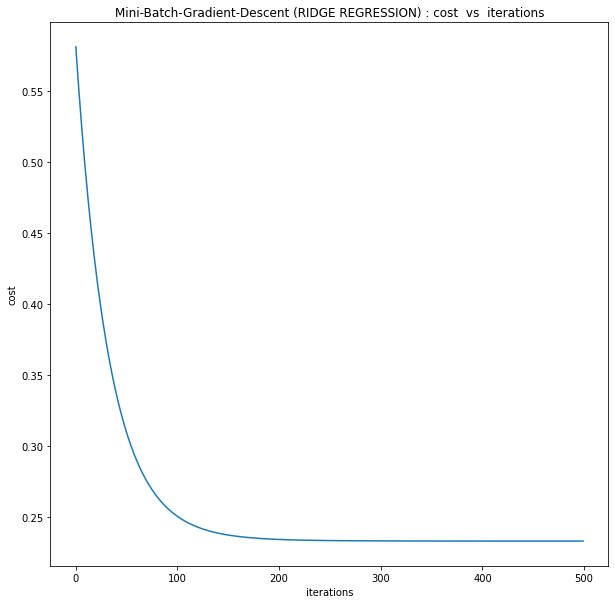

 
 
MSE : 0.9804204025867868
 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


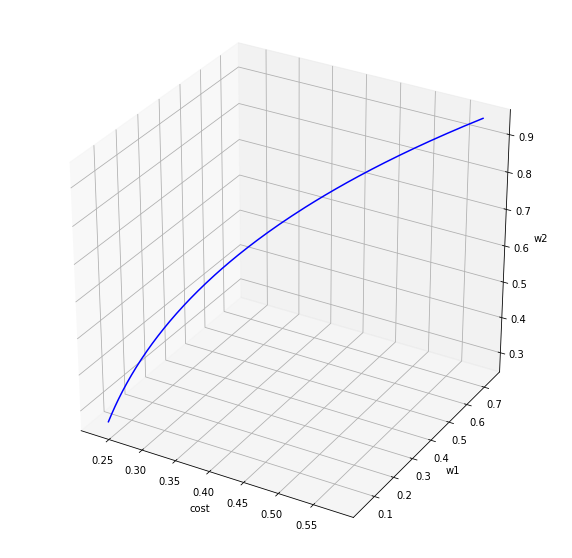

In [10]:
print("MINI BATCH GRADIENT DESCENT (RIDGE REGRESSION)")
print(" ")
w0_r_mbgd, w1_r_mbgd, w2_r_mbgd, cost_r_mbgd, w1_l_r_mbgd, w2_l_r_mbgd = ridge_mini_batch(x1, x2, y)
print("W0 :", w0_r_mbgd)
print("W1 :", w1_r_mbgd)
print("W2 :", w2_r_mbgd)
print(" ")
plot2d("cost", "iterations", cost_r_mbgd, "Mini-Batch-Gradient-Descent (RIDGE REGRESSION)")
print(" ")
plot3d(cost_r_mbgd, w1_l_r_mbgd, w2_l_r_mbgd, "cost", "w1", "w2", "Mini-Batch-Gradient-Descent (Ridge Regression)")
print(" ")
mse_r_mbgd = pred(w0_r_mbgd, w1_r_mbgd, w2_r_mbgd, X1, X2, Y)
print(" ")
time.sleep(5)

In [11]:
def ridge_stochastic_gradient_descent(x1, x2, y): 
    alpha = 0.00001  
    lamb = 0.6
    iter = 9999
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
    x0 = np.ones(x1.shape[0])
    cost = [0 for i in range(iter)]
    w0_l = [1 for i in range(iter)]
    w1_l = [1 for i in range(iter)]
    w2_l = [1 for i in range(iter)]
    h = hypothesis(w0, w1, w2, x1, x2)
    for itr in range(0, iter):
        i = random.randint(0, y.shape[0] - 1)
        w0 = (1- (alpha* lamb ))* w0 - alpha * ((h[i] - y[i]) * x0[i])
        w1 = (1- (alpha* lamb ))* w1 - alpha * ((h[i] - y[i]) * x1[i])
        w2 = (1- (alpha* lamb ))* w2 - alpha * ((h[i] - y[i]) * x2[i])
        w0_l[itr] = w0
        w1_l[itr] = w1
        w2_l[itr] = w2
        wsum = wsquare(w0,w1,w2)
        h = hypothesis(w0, w1, w2, x1, x2)
        cost[itr] = (1 * 0.5 * mse(h, y, y.shape[0])/x1.shape[0] + lamb * wsum) * 0.5
    return w0, w1, w2, cost, w1_l, w2_l

STOCHASTIC GRADIENT DESCENT (RIDGE REGRESSION)
W0 : 0.38212999736940506
W1 : 0.6226268388155253
W2 : 0.6490557499050544
 


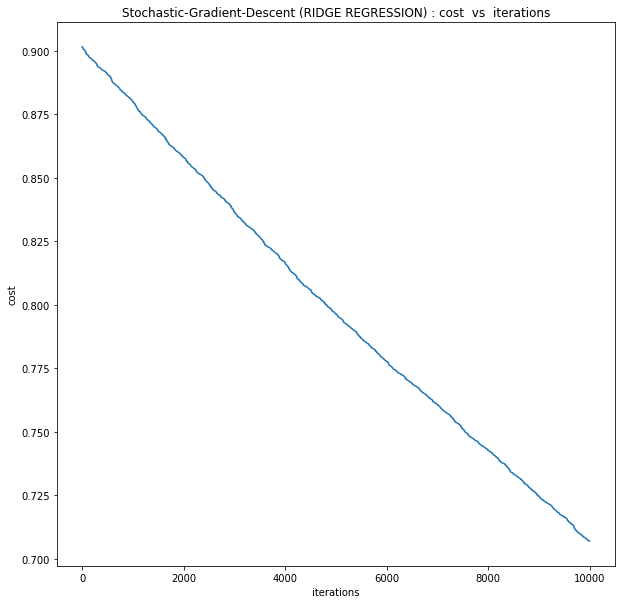

 
 
MSE : 2.3033872898008605


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


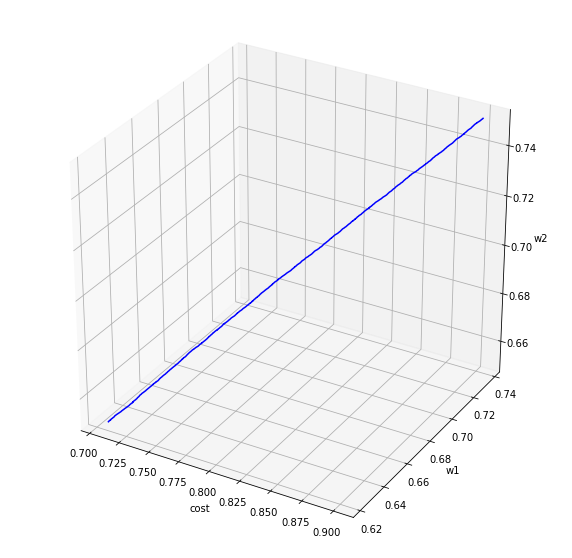

In [12]:
time.sleep(5)
print("STOCHASTIC GRADIENT DESCENT (RIDGE REGRESSION)")
w0_r_sgd, w1_r_sgd, w2_r_sgd, cost_r_sgd, w1_l_r_sgd, w2_l_r_sgd = ridge_stochastic_gradient_descent(x1, x2, y)
print("W0 :", w0_r_sgd)
print("W1 :", w1_r_sgd)
print("W2 :", w2_r_sgd)
print(" ")
plot2d("cost", "iterations", cost_r_sgd, "Stochastic-Gradient-Descent (RIDGE REGRESSION)")
print(" ")
plot3d(cost_r_sgd, w1_l_r_sgd, w2_l_r_sgd, "cost", "w1", "w2", "Stochastic-Gradient-Descent (Ridge Regression)")
print(" ")
mse_r_sgd = pred(w0_r_sgd, w1_r_sgd, w2_r_sgd, X1, X2, Y)
time.sleep(5)

# **Question 4**

In [13]:
def wabs(w0,w1,w2):
  w0 = abs(w0)
  w1 = abs(w1)
  w2 = abs(w2)
  return w0+w1+w2

In [14]:
def least_angle_regression_batch(x1,x2,y):
  lamb = 0.2
  alpha = 0.0005
  iter = 500
  w0 = random.uniform(0, 1)
  w1 = random.uniform(0, 1)
  w2 = random.uniform(0, 1)
  x0 = np.ones(x1.shape[0])
  cost = [0 for i in range(iter)]
  w0_l = [1 for i in range(iter)]
  w1_l = [1 for i in range(iter)]
  w2_l = [1 for i in range(iter)]
  for i in range(0,iter):
    h = hypothesis(w0, w1, w2, x1, x2)
    w0 = w0 - alpha * summation(h, y.shape[0], y, x0) - alpha * lamb * np.sign(w0) * 0.5
    w1 = w1 - alpha * summation(h, y.shape[0], y, x1) - alpha * lamb * np.sign(w1) * 0.5
    w2 = w2 - alpha * summation(h, y.shape[0], y, x2) - alpha * lamb * np.sign(w2) * 0.5
    w0_l[i] = w0
    w1_l[i] = w1
    w2_l[i] = w2
    wsum = wabs(w0,w1,w2)
    cost[i] = (1 * 0.5 * mse(h, y, y.shape[0])/x1.shape[0] + lamb * wsum) * 0.5
  return w0, w1, w2, cost, w1_l, w2_l

BATCH GRADIENT DESCENT (Least Angle Regression)
 
W0 : -2.6631158454239014e-05
W1 : 0.042731859120266
W2 : 0.2586669947177133
 


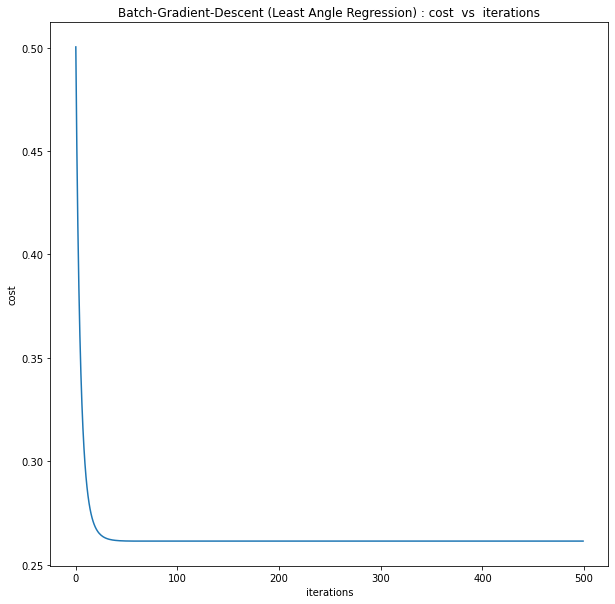

 
 
MSE : 0.9804722963598725


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


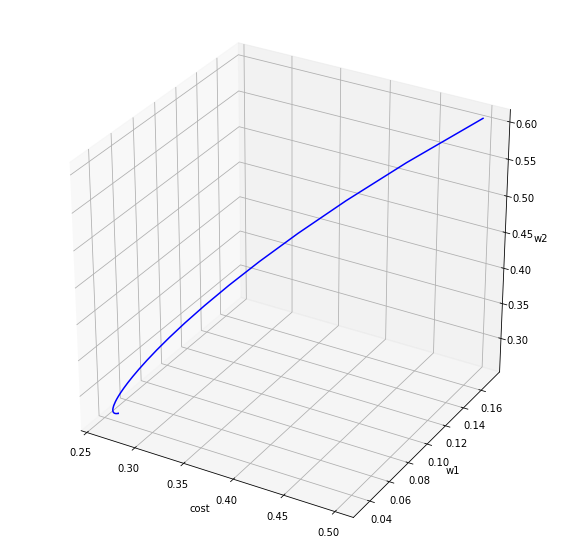

In [15]:
print("BATCH GRADIENT DESCENT (Least Angle Regression)")
print(" ")
w0_lar_bgd, w1_lar_bgd, w2_lar_bgd, cost_lar_bgd, w1_l_lar_bgd, w2_l_lar_bgd = least_angle_regression_batch(x1, x2, y)
print("W0 :", w0_lar_bgd)
print("W1 :", w1_lar_bgd)
print("W2 :", w2_lar_bgd)
print(" ")
plot2d("cost", "iterations", cost_lar_bgd, "Batch-Gradient-Descent (Least Angle Regression)")
print(" ")
plot3d(cost_lar_bgd, w1_l_lar_bgd, w2_l_lar_bgd, "cost", "w1", "w2", "Batch-Gradient-Descent (Least Angle Regression)")
print(" ")
mse_lar_bgd = pred(w0_lar_bgd, w1_lar_bgd, w2_lar_bgd, X1, X2, Y)
time.sleep(5)

In [16]:
def least_angle_mini_batch(x1, x2, y):
    iters = 500
    batch = 5
    alpha = 0.00001
    lamb = 0.05
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
    x0 = np.ones(x1.shape[0])
    cost = [0 for i in range(iters)]
    w0_l = [1 for i in range(iters)]
    w1_l = [1 for i in range(iters)]
    w2_l = [1 for i in range(iters)]
    for i in range(0, iters):
        temp = np.column_stack((x1, x2, y))
        np.random.shuffle(temp)
        x1, x2, y = split1(temp)
        for j in range(0, batch):
            h = hypothesis(w0, w1, w2, x1, x2)
            w0 = w0 - alpha * summation(h, y.shape[0], y, x0) - alpha * lamb * np.sign(w0) * 0.5
            w1 = w1 - alpha * summation(h, y.shape[0], y, x1) - alpha * lamb * np.sign(w1) * 0.5
            w2 = w2 - alpha * summation(h, y.shape[0], y, x2) - alpha * lamb * np.sign(w2) * 0.5
            w0_l[i] = w0
            w1_l[i] = w1
            w2_l[i] = w2
            wsum = wsquare(w0,w1,w2)
        h = hypothesis(w0, w1, w2, x1, x2)
        cost[i] = (1 * 0.5 * mse(h, y, y.shape[0])/x1.shape[0] + lamb * wsum) * 0.5
    return w0, w1, w2, cost, w1_l, w2_l

MINI BATCH GRADIENT DESCENT (Least Angle Regression)
 
W0 : 0.00105705671155066
W1 : 0.04606143030925074
W2 : 0.25624274680050924
 


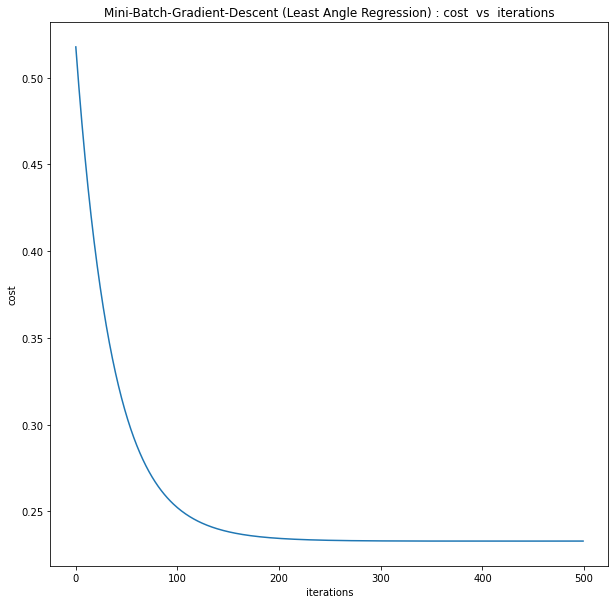

 
 
MSE : 0.9807834311295418
 
 
 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


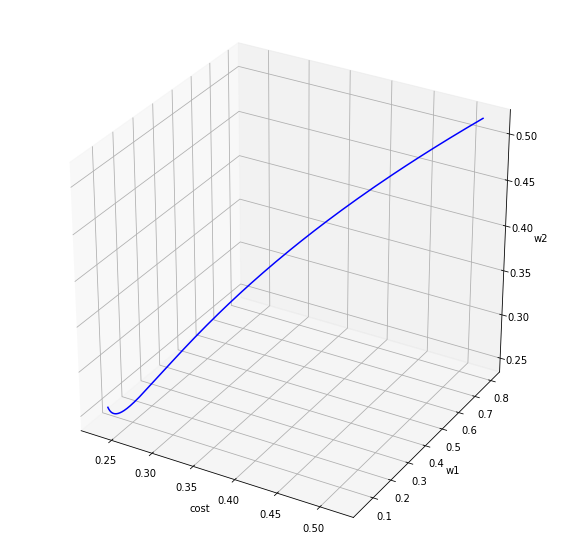

In [17]:
print("MINI BATCH GRADIENT DESCENT (Least Angle Regression)")
print(" ")
w0_lar_mbgd, w1_lar_mbgd, w2_lar_mbgd, cost_lar_mbgd, w1_l_lar_mbgd, w2_l_lar_mbgd = least_angle_mini_batch(x1, x2, y)
print("W0 :", w0_lar_mbgd)
print("W1 :", w1_lar_mbgd)
print("W2 :", w2_lar_mbgd)
print(" ")
plot2d("cost", "iterations", cost_lar_mbgd, "Mini-Batch-Gradient-Descent (Least Angle Regression)")
print(" ")
plot3d(cost_lar_mbgd, w1_l_lar_mbgd, w2_l_lar_mbgd, "cost", "w1", "w2", "Mini-Batch-Gradient-Descent (Least Angle Regression)")
print(" ")
mse_lar_mbgd = pred(w0_lar_mbgd, w1_lar_mbgd, w2_lar_mbgd, X1, X2, Y)
print(" ")
print(" ")
print(" ")
time.sleep(5)

In [18]:
def least_angle_stochastic_gradient_descent(x1, x2, y):
    alpha = 0.00001  
    lamb = 0.09
    iter = 9999
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
    x0 = np.ones(x1.shape[0])
    cost = [0 for i in range(iter)]
    w0_l = [1 for i in range(iter)]
    w1_l = [1 for i in range(iter)]
    w2_l = [1 for i in range(iter)]
    h = hypothesis(w0, w1, w2, x1, x2)
    for itr in range(0, iter):
        i = random.randint(0, y.shape[0] - 1)
        w0 = w0 - alpha * summation(h, y.shape[0], y, x0) - alpha * lamb * np.sign(w0) * 0.5
        w1 = w1 - alpha * summation(h, y.shape[0], y, x1) - alpha * lamb * np.sign(w1) * 0.5
        w2 = w2 - alpha * summation(h, y.shape[0], y, x2) - alpha * lamb * np.sign(w2) * 0.5
        w0_l[itr] = w0
        w1_l[itr] = w1
        w2_l[itr] = w2
        wsum = wabs(w0,w1,w2)
        h = hypothesis(w0, w1, w2, x1, x2)
        cost[itr] = (1 * 0.5 * mse(h, y, y.shape[0])/x1.shape[0] + lamb * wsum) * 0.5
    return w0, w1, w2, cost, w1_l, w2_l

STOCHASTIC GRADIENT DESCENT (Least Angle Regression)
W0 : -2.2527595887438826e-07
W1 : 0.0429084148774548
W2 : 0.25884354543208943
 


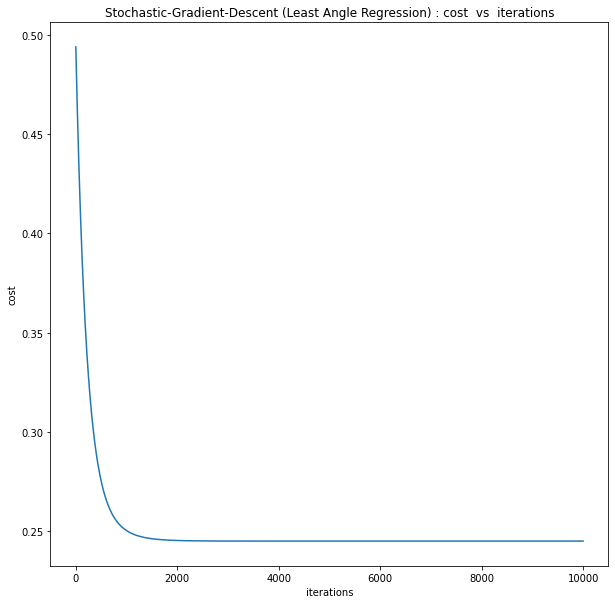

 
 
MSE : 0.9804546487978291


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


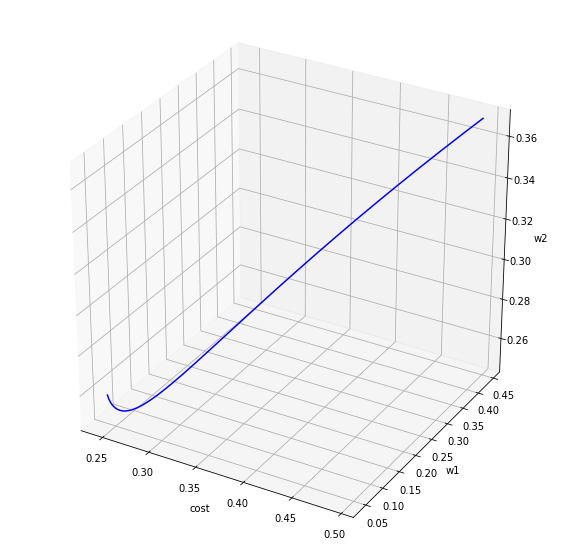

In [19]:
time.sleep(5)
print("STOCHASTIC GRADIENT DESCENT (Least Angle Regression)")
w0_lar_sgd, w1_lar_sgd, w2_lar_sgd, cost_lar_sgd, w1_l_lar_sgd, w2_l_lar_sgd = least_angle_stochastic_gradient_descent(x1, x2, y)
print("W0 :", w0_lar_sgd)
print("W1 :", w1_lar_sgd)
print("W2 :", w2_lar_sgd)
print(" ")
plot2d("cost", "iterations", cost_lar_sgd, "Stochastic-Gradient-Descent (Least Angle Regression)")
print(" ")
plot3d(cost_lar_sgd, w1_l_lar_sgd, w2_l_lar_sgd, "cost", "w1", "w2", "Stochastic-Gradient-Descent (Least Angle Regression)")
print(" ")
mse_lar_sgd = pred(w0_lar_sgd, w1_lar_sgd, w2_lar_sgd, X1, X2, Y)
time.sleep(5)